In [1]:
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from numpy.polynomial.polynomial import polyfit
from scipy import signal
from scipy.stats import norm

import matplotlib

import matplotlib.pyplot as plt
import netCDF4 as nc
from matplotlib import pyplot
from matplotlib import colors as mcolors
import matplotlib.gridspec as gridspec
from scipy.stats import norm
from mpl_toolkits.axes_grid1 import make_axes_locatable

from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter



In [2]:
def deg_to_dms(deg, pretty_print=None, ndp=4):
    """Convert from decimal degrees to degrees, minutes, seconds."""

    m, s = divmod(abs(deg)*3600, 60)
    d, m = divmod(m, 60)
    if deg < 0:
        d = -d
    d, m = int(d), int(m)

    if pretty_print:
        if pretty_print=='latitude':
            hemi = 'N' if d>=0 else 'S'
        elif pretty_print=='longitude':
            hemi = 'E' if d>=0 else 'W'
        else:
            hemi = '?'
        return '{d:d}° {m:d}? {s:.{ndp:d}f}? {hemi:1s}'.format(
                    d=abs(d), m=m, s=s, hemi=hemi, ndp=ndp)
    return d, m, s

In [3]:
FLDR_AGRIF='/data/vdi/tbrivoal/RUNS_DATA/EXP02_AGRIF_finaldomain_bathycorrected_qco_boost2_noslip/'
FLDR_TWIN='/data/vdi/tbrivoal/RUNS_DATA/eNEATL36_trunk_r4_2-RC_r15113_IFS_EXP02_2017_2018_AGRIFTWIN_TRUE/'


file_name_36='eNEATL36_1d_gridU25h.nc.gibraltar2'
file_name_108='1_AGRIF_1d_gridU25h.nc.gibraltar2'
coord_name_36='domain_cfg.nc'
coord_name_108='1_domain_cfg.nc'



In [4]:
print(FLDR_AGRIF + file_name_36)

/data/vdi/tbrivoal/RUNS_DATA/EXP02_AGRIF_finaldomain_bathycorrected_qco_boost2_noslip/eNEATL36_1d_gridU25h.nc.gibraltar2


In [5]:
y_min,y_max = 375 , 475
x_coupe = 522
imin_IBI_AGRIF=220
imax_IBI_AGRIF=1073
jmin_IBI_AGRIF=350
jmax_IBI_AGRIF=1245

y_min_agrif=(y_min - jmin_IBI_AGRIF)*3 + 5
y_max_agrif=(y_max - jmin_IBI_AGRIF)*3 + 5
x_coupe_agrif=(x_coupe - imin_IBI_AGRIF)*3 + 5
DSTART = '2017-02-01'
DEND = '2018-02-01'

ds_AGRIF_36 = xr.open_dataset(FLDR_AGRIF + file_name_36).sel(time_counter=slice(DSTART, DEND))
ds_AGRIF_108 = xr.open_dataset(FLDR_AGRIF + file_name_108).sel(time_counter=slice(DSTART, DEND))
ds_TWIN_36 = xr.open_dataset(FLDR_TWIN + file_name_36).sel(time_counter=slice(DSTART, DEND))
coord_AGRIF_36 = xr.open_dataset(FLDR_AGRIF + coord_name_36, drop_variables={"x", "y",}).isel(y=np.arange(y_min,y_max)).isel(x=x_coupe)
coord_AGRIF_108 = xr.open_dataset(FLDR_AGRIF + coord_name_108, drop_variables={"x", "y",}).isel(y=np.arange(y_min_agrif,y_max_agrif)).isel(x=x_coupe_agrif)
coord_TWIN_36 = xr.open_dataset(FLDR_TWIN + coord_name_36, drop_variables={"x", "y",}).isel(y=np.arange(y_min,y_max)).isel(x=x_coupe)

coord_TWIN_36.glamt

<xarray.DataArray 'glamt' (time_counter: 1, y: 100)>
array([[-5.3658  , -5.365478, -5.365155, -5.36483 , -5.364504, -5.364177,
        -5.363847, -5.363517, -5.363185, -5.362851, -5.362516, -5.362179,
        -5.361841, -5.361502, -5.36116 , -5.360818, -5.360474, -5.360128,
        -5.359781, -5.359432, -5.359081, -5.35873 , -5.358376, -5.358021,
        -5.357665, -5.357307, -5.356947, -5.356586, -5.356223, -5.355858,
        -5.355492, -5.355125, -5.354756, -5.354385, -5.354013, -5.353639,
        -5.353263, -5.352886, -5.352507, -5.352127, -5.351745, -5.351361,
        -5.350976, -5.350589, -5.350201, -5.349811, -5.349419, -5.349025,
        -5.34863 , -5.348234, -5.347835, -5.347435, -5.347033, -5.34663 ,
        -5.346225, -5.345818, -5.34541 , -5.344999, -5.344588, -5.344174,
        -5.343759, -5.343342, -5.342923, -5.342503, -5.342081, -5.341657,
        -5.341231, -5.340804, -5.340375, -5.339944, -5.339512, -5.339077,
        -5.338641, -5.338204, -5.337764, -5.337323, -5.33688 , -5.336435,
        -5.335988, -5.33554 , -5.33509 , -5.334638, -5.334184, -5.333729,
        -5.333271, -5.332812, -5.332351, -5.331889, -5.331424, -5.330958,
        -5.330489, -5.330019, -5.329548, -5.329074, -5.328598, -5.328121,
        -5.327642, -5.327161, -5.326678, -5.326193]])
Coordinates:
  * time_counter  (time_counter) float32 0.0
Dimensions without coordinates: y

In [6]:
print(coord_AGRIF_108.glamt)
print(coord_AGRIF_36.glamt)

<xarray.DataArray 'glamt' (time_counter: 1, y: 300)>
array([[-5.3658  , -5.365693, -5.365586, ..., -5.326193, -5.326031, -5.325868]])
Coordinates:
  * time_counter  (time_counter) float32 0.0
Dimensions without coordinates: y
<xarray.DataArray 'glamt' (time_counter: 1, y: 100)>
array([[-5.3658  , -5.365478, -5.365155, -5.36483 , -5.364504, -5.364177,
        -5.363847, -5.363517, -5.363185, -5.362851, -5.362516, -5.362179,
        -5.361841, -5.361502, -5.36116 , -5.360818, -5.360474, -5.360128,
        -5.359781, -5.359432, -5.359081, -5.35873 , -5.358376, -5.358021,
        -5.357665, -5.357307, -5.356947, -5.356586, -5.356223, -5.355858,
        -5.355492, -5.355125, -5.354756, -5.354385, -5.354013, -5.353639,
        -5.353263, -5.352886, -5.352507, -5.352127, -5.351745, -5.351361,
        -5.350976, -5.350589, -5.350201, -5.349811, -5.349419, -5.349025,
        -5.34863 , -5.348234, -5.347835, -5.347435, -5.347033, -5.34663 ,
        -5.346225, -5.345818, -5.34541 , -5.344999, -5.

In [7]:
e2t_AGRIF_36=coord_AGRIF_36.e2u.squeeze()
e3t_AGRIF_36=coord_AGRIF_36.e3u_0.squeeze()
e2t_AGRIF_108=coord_AGRIF_108.e2u.squeeze()
e3t_AGRIF_108=coord_AGRIF_108.e3u_0.squeeze()
e2t_TWIN_36=coord_TWIN_36.e2t.squeeze()
e3t_TWIN_36=coord_TWIN_36.e3u_0.squeeze()

e2te3t_AGRIF_36= e3t_AGRIF_36 * e2t_AGRIF_36 
e2te3t_AGRIF_108=e3t_AGRIF_108 * e2t_AGRIF_108
e2te3t_TWIN_36=e3t_TWIN_36 * e2t_TWIN_36 

lat_AGRIF_36 = coord_AGRIF_36.gphit.squeeze()
lat_AGRIF_108 = coord_AGRIF_108.gphit.squeeze()
lat_TWIN_36 = coord_TWIN_36.gphit.squeeze()

depthu_AGRIF_36 = ds_AGRIF_36.depthu.squeeze()
depthu_AGRIF_108 = ds_AGRIF_108.depthu.squeeze()
depthu_TWIN_36 = ds_TWIN_36.depthu.squeeze()


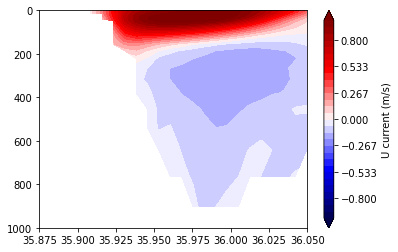

In [8]:
X,Y = np.meshgrid(lat_AGRIF_108,depthu_AGRIF_108)
ax=plt.subplot(111)
plt.contourf(X,Y,ds_AGRIF_108.vozocrtx.squeeze().mean(dim='time_counter'),cmap='seismic',levels=np.linspace(-1,1,31),extend='both')
ax.set_xlim(35.875,36.05)
ax.set_ylim(0,1000)
plt.gca().invert_yaxis()
plt.colorbar(label='U current (m/s)')
plt.savefig('section_gibraltar_AGRIF.png')

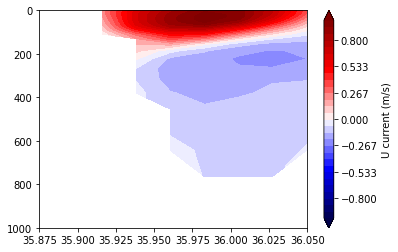

In [9]:
X,Y = np.meshgrid(lat_TWIN_36,depthu_TWIN_36)
ax=plt.subplot(111)
plt.contourf(X,Y,ds_TWIN_36.vozocrtx.squeeze().mean(dim='time_counter'),cmap='seismic',levels=np.linspace(-1,1,31),extend='both')
ax.set_xlim(35.875,36.05)
ax.set_ylim(0,1000)
plt.gca().invert_yaxis()
plt.colorbar(label='U current (m/s)')
plt.savefig('section_gibraltar_TWIN.png')

In [10]:
e2te3t_AGRIF_36 = np.zeros(ds_AGRIF_36.vozocrtx.squeeze().shape)
e2te3t_AGRIF_108 = np.zeros(ds_AGRIF_108.vozocrtx.squeeze().shape)
e2te3t_TWIN_36 = np.zeros(ds_TWIN_36.vozocrtx.squeeze().shape)


In [11]:
e2te3t_AGRIF_36[:,:,:] = (e3t_AGRIF_36/1000) * (e2t_AGRIF_36/1000)
e2te3t_AGRIF_108[:,:,:] =(e3t_AGRIF_108/1000) * (e2t_AGRIF_108 /1000)
e2te3t_TWIN_36[:,:,:] = (e3t_TWIN_36/1000) * (e2t_TWIN_36 /1000)

e2te3t_AGRIF_36 = np.where(np.isnan(ds_AGRIF_36.vozocrtx.squeeze().values),np.nan,e2te3t_AGRIF_36)
e2te3t_AGRIF_108 = np.where(np.isnan(ds_AGRIF_108.vozocrtx.squeeze().values),np.nan,e2te3t_AGRIF_108)
e2te3t_TWIN_36 = np.where(np.isnan(ds_TWIN_36.vozocrtx.squeeze().values),np.nan,e2te3t_TWIN_36)


In [12]:
print(np.nansum(e2te3t_AGRIF_36[0,:,:]))
print(np.nansum(e2te3t_AGRIF_108[0,:,:]))
print(np.nansum(e2te3t_TWIN_36[0,:,:]))


13.11089326963209
12.980078892269592
12.466067256081462


In [13]:
e2te3t_AGRIF_36[:,:,:] = (e3t_AGRIF_36) * (e2t_AGRIF_36)
e2te3t_AGRIF_108[:,:,:] =(e3t_AGRIF_108) * (e2t_AGRIF_108 )
e2te3t_TWIN_36[:,:,:] = (e3t_TWIN_36) * (e2t_TWIN_36 )

e2te3t_AGRIF_36 = np.where(np.isnan(ds_AGRIF_36.vozocrtx.squeeze().values),np.nan,e2te3t_AGRIF_36)
e2te3t_AGRIF_108 = np.where(np.isnan(ds_AGRIF_108.vozocrtx.squeeze().values),np.nan,e2te3t_AGRIF_108)
e2te3t_TWIN_36 = np.where(np.isnan(ds_TWIN_36.vozocrtx.squeeze().values),np.nan,e2te3t_TWIN_36)


In [14]:
Trsp_AGRIF_36 = ds_AGRIF_36.vozocrtx * e2te3t_AGRIF_36
Trsp_AGRIF_108 = ds_AGRIF_108.vozocrtx * e2te3t_AGRIF_108
Trsp_TWIN_36 = ds_TWIN_36.vozocrtx * e2te3t_TWIN_36

Trsp_AGRIF_36_i = Trsp_AGRIF_36.where(Trsp_AGRIF_36.values > 0,np.nan )
Trsp_AGRIF_108_i = Trsp_AGRIF_108.where(Trsp_AGRIF_108.values > 0,np.nan )
Trsp_TWIN_36_i = Trsp_TWIN_36.where(Trsp_TWIN_36.values > 0,np.nan )

Trsp_AGRIF_36_o = Trsp_AGRIF_36.where(Trsp_AGRIF_36.values < 0,np.nan )
Trsp_AGRIF_108_o = Trsp_AGRIF_108.where(Trsp_AGRIF_108.values < 0,np.nan )
Trsp_TWIN_36_o = Trsp_TWIN_36.where(Trsp_TWIN_36.values < 0,np.nan )

time = ds_AGRIF_36.time_counter

In [15]:
print('Netflow')
# print(np.nansum(np.nanmean(Trsp_AGRIF_36,axis=0))/10e6)
print(np.nanmean(Trsp_AGRIF_108.sum(dim='depthu').sum(dim='y')) / 1000000)
print(np.nanmean(Trsp_TWIN_36.sum(dim='depthu').sum(dim='y'))/ 1000000)

print('Inflow')
# print(np.nansum(np.nanmean(Trsp_AGRIF_36_i,axis=0))/10e6)
print(np.nanmean(Trsp_AGRIF_108_i.sum(dim='depthu').sum(dim='y')) / 1000000)
print(np.nanmean(Trsp_TWIN_36_i.sum(dim='depthu').sum(dim='y')) / 1000000)

print('Outflow')
# print(np.nansum(np.nanmean(Trsp_AGRIF_36_o,axis=0))/10e6)
print(np.nanmean(Trsp_AGRIF_108_o.sum(dim='depthu').sum(dim='y')) / 1000000)
print(np.nanmean(Trsp_TWIN_36_o.sum(dim='depthu').sum(dim='y')) / 1000000)

Netflow
0.24576598876777006
0.2006027281791747
Inflow
1.2267254463935626
1.2240457917519585
Outflow
-0.980959457625793
-1.0234430635727838


In [16]:
1e6

1000000.0

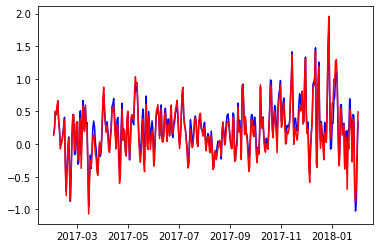

In [17]:
plt.plot(time,Trsp_AGRIF_108.sum(dim='depthu').sum(dim='y') / 1000000,color='b',)
# plt.plot(time,Trsp_AGRIF_36.sum(dim='depthu').mean(dim='y'),color='b')
plt.plot(time,Trsp_TWIN_36.sum(dim='depthu').sum(dim='y') / 1000000,color='r')


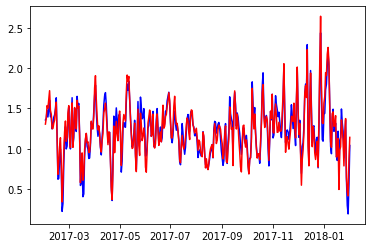

In [18]:
plt.plot(time,Trsp_AGRIF_108_i.sum(dim='depthu').sum(dim='y') / 1000000,color='b',)
# plt.plot(time,Trsp_AGRIF_36.sum(dim='depthu').mean(dim='y'),color='b')
plt.plot(time,Trsp_TWIN_36_i.sum(dim='depthu').sum(dim='y') / 1000000,color='r')

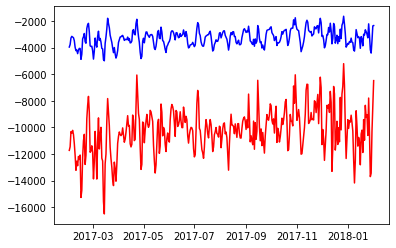

In [19]:
plt.plot(time,Trsp_AGRIF_108_o.sum(dim='depthu').mean(dim='y'),color='b',)
# plt.plot(time,Trsp_AGRIF_36_i.sum(dim='depthu').mean(dim='y'),color='b')
plt.plot(time,Trsp_TWIN_36_o.sum(dim='depthu').mean(dim='y'),color='r')